# <center><b><span style="color:#FF5A5F" >AIRBNB</span> x </b> <b><span style="color:#FF5A5F">RENTA SEGURA</span></b></center>

<img src = Airbnb-Logo-Contest.png width="1200">


# FINAL PROJECT


<b> Alessandro Carati 41430 </b>

<b> Matteo Arcicasa 33825  </b> 

<b> Matteo Matera 41596 </b> 

<b> Riccardo Piovesan ... </b> 

<b> Stefano Grancini ... </b> 

<b> Tobias Tesing 41683 </b> 


# Table of Content

##  1) [Introduction](#introduction) 
 

## 2) Our Dataset 

##### 2.1) [Curation of the dataset](#curation) (2)
##### 2.2) [General Overview](#overview) (1)
##### 2.3) [Statistical Analysis](#statistics) (2)


## 3) Possible Solutions

##### 3.1) Per Neighborhood (3)
##### 3.2) Per Market Player (1)
##### 3.3) Per Usage Ratio (2+)

### 4) [Conclusion](#conclusion)

<a id="introduction"></a>
# Introduction 

For our project, we went to analyze a dataset containing information about Airbnb listings. 
As the proposal submitted already shows, we found a sharp decline in the short-term rental business due to a dizzying reduction in tourism, which prompted us to look for possible recovery solutions. Our main idea is to implement the project already started by the municipality of Lisbon "Renda Secura" to the apartments in Aibnb. In this way, in fact, we could resume a currently stagnant economy by giving a fixed income to the owners of the apartments and repopulating the city with its citizens.

We will alternate parts of storytelling with parts of dataset analysis and its consequent outputs during the whole Notebook course. The work is structured in different phases. The first part of the work includes the curation of the dataset, a general overview of rentals in Lisbon, and a statistical survey of variables. 

We wondered, then, what were the possible solutions to the market stagnation. We then identified three possible ways to focus on. First, we analyzed the listings based on the different neighborhoods, looking for those most affected. Then we went to see which were the major players in the market so that we had the opportunity to enter into multiple contracts and to obtain subsidized prices. Finally, we tried to identify a small number of listings through the usage ratio, prioritizing those vacant apartments in the past year (dates to be entered).

# OUR DATASET
<a id="curation"></a>
## 2.1 Curation of the dataset

In [324]:
#import libraries
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
import sys
import pylab as p
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
import json
import geopandas as gpd
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import LogTicker, ColorBar,GeoJSONDataSource,LinearColorMapper,LogColorMapper,HoverTool, Slider
from bokeh.layouts import row
from bokeh.io import output_notebook, push_notebook
from bokeh.palettes import brewer
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

In [325]:
os.getcwd()
# os.chdir('/Users/alessandrocarati/OneDrive - NOVASBE/Data Visualization Project')
# os.chdir("\\Users\\tobia\\OneDrive\\Dokumente\\Vwl\\Master\\3. Semester\\Data Visualization\\Project\\Sharepoint\\Data Visualization Project")

'C:\\Users\\tobia\\OneDrive\\Dokumente\\Vwl\\Master\\3. Semester\\Data Visualization\\Project\\Sharepoint\\Data Visualization Project'

Having a very large dataset available, as first thing we picked only the data needed for the analysis.Then, we made adjustments to the columns that required it (e.g. we rounded up the number of bathrooms and corrected typos). We noted the presence of price outliers that muddled the distribution. Consequently, as shown in <b>graph1</b>, we decided to consider only prices up to 500€ per night, excluding 1% of listings.

As our project is the implementation of Renta Segura to the houses in Lisbon used for short term rentals, we created a copy dataset containing only the listings of the city without affecting the initial dataset. 

In [326]:
#import listings
listings = pd.read_csv("Files/listings.csv.gz",compression="gzip")
#columns to use
useful_columns ="id,host_id,host_name,host_since,host_location,host_is_superhost,\
host_listings_count,host_total_listings_count,neighbourhood,\
neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,\
longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,\
bedrooms,beds,amenities,price,minimum_nights,has_availability,availability_30,\
availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,\
review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,\
review_scores_location,review_scores_value,license,calculated_host_listings_count,\
calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,\
calculated_host_listings_count_shared_rooms,reviews_per_month"
useful_columns_list = useful_columns.split(",")
listings = listings[useful_columns_list]
#convert price from string to float
listings.price=listings.price.str.replace(",","").str[1:].astype("float64")
#correct mispelled neighbourhood listings
listings.replace({"Misericrdia":"Misericordia",
                       "So Vicente":"Sao Vicente",
                       "Santo Antnio":"Santo Antonio",
                       "Penha de Frana":"Penha de Franca",
                       "Belm":"Belem",
                       "Alcntara":"Alcantara",
                       "So Domingos de Benfica":"Sao Domingos de Benfica",
                       "Parque das Naes":"Parque das Nacoes"},inplace=True)
#for the sake of semplicity value like 1.5 are 
#rounded to the next integer (2 in the example above)
def get_bath_n(x):
    try:
        if x[0].isnumeric():
            n_bath= round(eval(x.split()[0]))
            return n_bath
        else:
            return n_bath
    except: #np.nan
        return x
listings["bathrooms_text"].replace({"Half-bath":1,"Shared half-bath":1,"Private half-bath":1},inplace=True)
listings["bathrooms_text"]=listings["bathrooms_text"].apply(lambda x: get_bath_n(x))  


In [327]:
#remove price outliers
l=listings.loc[listings.price<=500]

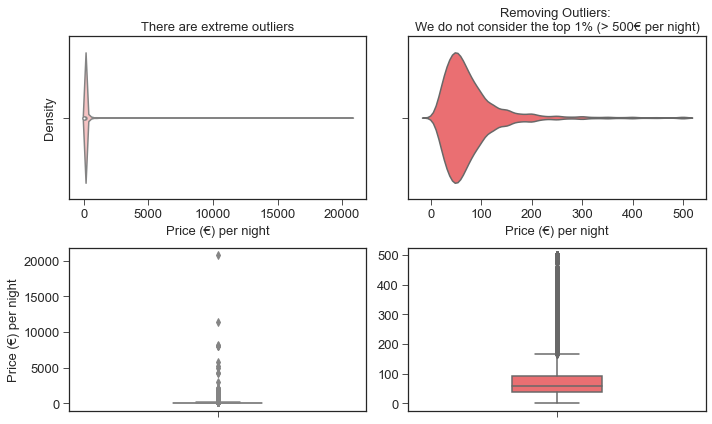

In [371]:
fig,ax = plt.subplots(2,2,figsize=(10,10*.6))
sns.violinplot(ax=ax[0,0],data=listings,x="price", color = "#ffbaba");
sns.violinplot(ax=ax[0,1],data=l,x="price", color = "#FF5A5F", inner = None);
sns.boxplot(ax=ax[1,0], data = listings, y="price", width=0.3, color= "#ffbaba")
sns.boxplot(ax=ax[1,1], data = l, y="price", width=0.3, color = "#FF5A5F")
ax[0,0].set_title("There are extreme outliers", fontsize = 13)
ax[0,0].set_ylabel("Density", fontsize = 13)
ax[0,0].set_xlabel("Price (€) per night", fontsize = 13)
# ax[0,0].set_xticks(fontsize = 13, labelcolor = "#445E8D")

ax[0,1].set_xlabel("Price (€) per night", fontsize = 13)
ax[1,0].set_ylabel("Price (€) per night", fontsize = 13)
ax[1,1].set_ylabel("")

for i in range(2):
    for j in range(2):
        plt.sca(ax[i, j])
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)

ax[0,1].set_title("Removing Outliers: \nWe do not consider the top 1% (> 500€ per night)", fontsize = 13)
plt.tight_layout()
plt.show()

In [329]:
listings_small=pd.read_csv("Files/listings.csv",parse_dates=["last_review"],index_col=0)
#correct name of freguesias
listings_small.replace({"Misericrdia":"Misericordia",
                       "So Vicente":"Sao Vicente",
                       "Santo Antnio":"Santo Antonio",
                       "Penha de Frana":"Penha de Franca",
                       "Belm":"Belem",
                       "Alcntara":"Alcantara",
                       "So Domingos de Benfica":"Sao Domingos de Benfica",
                       "Parque das Naes":"Parque das Nacoes"},inplace=True)
#remove extreme outliers as above
listings_small = listings_small.loc[(listings_small.price<=500)&(listings_small.price>0)]


In [330]:
## merge listings_small and listings
## create a cleaner dataframe with useful variables only
'''
columns_to_merge=["id","property_type","accommodates","bathrooms_text","bedrooms","beds","amenities","availability_30","availability_60","availability_90"]
listings_to_merge= listings[columns_to_merge]
listings_small=pd.merge(listings_small, listings_to_merge,on="id",how="left")
'''

'\ncolumns_to_merge=["id","property_type","accommodates","bathrooms_text","bedrooms","beds","amenities","availability_30","availability_60","availability_90"]\nlistings_to_merge= listings[columns_to_merge]\nlistings_small=pd.merge(listings_small, listings_to_merge,on="id",how="left")\n'

In [331]:
bedroom_labels = ["one_bedroom","two_bedrooms","three_bedrooms","four_bedrooms","4+_bedrooms"]
listings_small["bedrooms_count"]=pd.cut(listings_small.bedrooms,bins=[0,1,2,3,4,25],labels=bedroom_labels,right=True)

In [332]:
#ADD AREA VARIABLE
'''
a= [2.88,5.07,5.34,1.74,2.13,2.99,2.46,10.43,8.03,1.65,2.77,3.69,4.6,6.57,7.12,2.19,8.09,5.44,2.71,3.36,3.01,1.49,4.29,1.99]
freguesia= ['Ajuda',
 'Alcantara',
 'Alvalade',
 'Areeiro',
 'Arroios',
 'Avenidas Novas',
 'Beato',
 'Belem',
 'Benfica',
 'Campo de Ourique',
 'Campolide',
 'Carnide',
 'Estrela',
 'Lumiar',
 'Marvila',
 'Misericordia',
 'Olivais',
 'Parque das Nacoes',
 'Penha de Franca',
 'Santa Clara',
 'Santa Maria Maior',
 'Santo Antonio',
 'Sao Domingos de Benfica',
 'Sao Vicente']
area_freguesia= dict(zip(freguesia, a))
listings_small["area"]=listings_small.neighbourhood.map(area_freguesia)
'''

'\na= [2.88,5.07,5.34,1.74,2.13,2.99,2.46,10.43,8.03,1.65,2.77,3.69,4.6,6.57,7.12,2.19,8.09,5.44,2.71,3.36,3.01,1.49,4.29,1.99]\nfreguesia= [\'Ajuda\',\n \'Alcantara\',\n \'Alvalade\',\n \'Areeiro\',\n \'Arroios\',\n \'Avenidas Novas\',\n \'Beato\',\n \'Belem\',\n \'Benfica\',\n \'Campo de Ourique\',\n \'Campolide\',\n \'Carnide\',\n \'Estrela\',\n \'Lumiar\',\n \'Marvila\',\n \'Misericordia\',\n \'Olivais\',\n \'Parque das Nacoes\',\n \'Penha de Franca\',\n \'Santa Clara\',\n \'Santa Maria Maior\',\n \'Santo Antonio\',\n \'Sao Domingos de Benfica\',\n \'Sao Vicente\']\narea_freguesia= dict(zip(freguesia, a))\nlistings_small["area"]=listings_small.neighbourhood.map(area_freguesia)\n'

In [333]:
#WRONG FILECORRECTED (NOT LISTINGS)
lisbon_listings=listings_small.loc[listings_small.neighbourhood_group == "Lisboa"].copy()

<a id="overview"></a>
## 2.2 GENERAL OVERVIEW

This is Joao: 

<img src = joao.jpg width="320">




Joao, his wife Jannina and his son José are expecting a fourth family member: Joaquim. Due to the fact that the current apartment will soon become too small, Joao is looking for a new home. The family wants to stay in Joaos and Joanas hometown: <b> Lisbon </b>. They ask their current landlord Jair for help, because he owns several apartments in the city. However, Jair immediately rejects Joaos and Joanas request: “Ahahaha, no way. I am renting my properties to tourists, they have more money than you.” 

In the recent years, the city of Lisbon welcomed more and more tourists each year. Joao likes to meet people from other countries, but with their high wages from rich countries the tourists occupy more and more housing spaces in the city.  It turned out that they do not only stay in hostels but also rent whole apartments. Most of these short-term rental agreements are closed via a platform called  <b><span style="color:#FF5A5F">Airbnb</span></b>. Let’s see what kind of apartments we can find on Airbnb in Lisbon and where they are:

In [334]:
lats2018 = lisbon_listings['latitude'].tolist()
lons2018 = lisbon_listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[38.70744475993871, -9.136274013769265],
                  zoom_start=13,control_scale=True)
                  #height=500,width=1500)
FastMarkerCluster(data=locations).add_to(map1)
map1

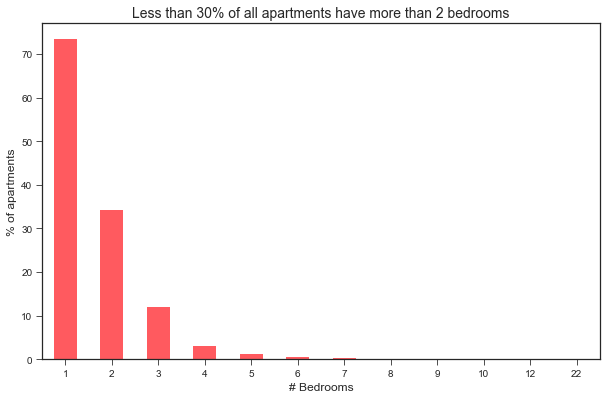

In [374]:
numerical=lisbon_listings.select_dtypes(include=["float64","int64"])
df = numerical[["bedrooms"]].copy()
fig,ax = plt.subplots(1,1,figsize=(10,10*0.618))
hist_bedrooms = df.bedrooms.value_counts(sort=False).sort_index() 
(100*hist_bedrooms/len(for_hist)).plot(kind='bar', color="#FF5A5F") 
# for x in range(len(hist_bedrooms)):
  #   plt.text(x-0.05, (100* hist_bedrooms[x]/len(df)+2), hist_bedrooms[x])
plt.xlabel("# Bedrooms", fontsize = 12)
plt.ylabel("% of apartments", fontsize = 12);
plt.title("Less than 30% of all apartments have more than 2 bedrooms", fontsize = 14)
ticks_pos = plt.xticks()
plt.xticks(ticks=ticks_pos[0], labels = [1,2,3,4,5,6,7,8,9,10,12,22], rotation=None);

Through [Determinants of House Prices: A Quantile Regression Approach](https://www.researchgate.net/publication/23534659_Determinants_of_House_Prices_A_Quantile_Regression_Approach)
, it is possible to state that the number of rooms and the square footage of a house are statistically significant to the rent price. Joao would therefore have to pay a higher rent than the current one in order to afford an extra room to accommodate little Joaquim. 

We then analyzed if this correlation is also present betweem Aibnb listings prices and their room numbers (graph3). Furthermore, another important indipendent variable that affects prices is the neighbourhood where the house is allocated. Through Graph4, we highlights the average price of all the listings (black vertical line) and we were able to split them in 

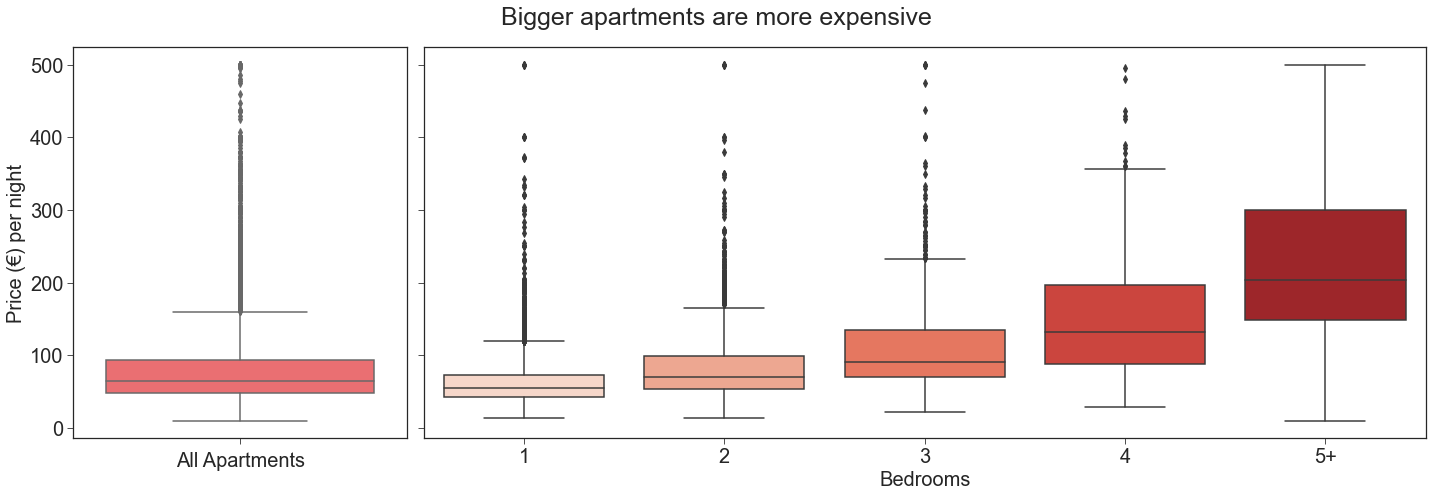

In [376]:
fig, ax = plt.subplots(1,2,figsize=(20,7),gridspec_kw={"width_ratios":[1,3]},sharey=True)
apartments=lisbon_listings.loc[lisbon_listings.room_type=="Entire home/apt"].copy()
sns.boxplot(data=apartments,y="price", color="#FF5A5F", ax=ax[0]);
sns.boxplot(data=apartments,y="price",x="bedrooms_count", palette = "Reds",order=['one_bedroom', 'two_bedrooms','three_bedrooms','four_bedrooms','4+_bedrooms'],ax=ax[1]);
ax[0].set_xlabel("All Apartments", fontsize = 20)
ax[0].set_ylabel("Price (€) per night", fontsize = 20)
ax[1].set_xlabel("Bedrooms", fontsize = 20)
ax[1].set_ylabel("", fontsize = 20)
ticks_pos=plt.xticks()
plt.xticks(ticks=ticks_pos[0], labels = ["1", "2", "3", "4", "5+"])
ax[1] = plt.gca()
ax[1].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[0].tick_params(axis = 'y', which = 'major', labelsize = 20)

fig.suptitle("Bigger apartments are more expensive",fontsize=25)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

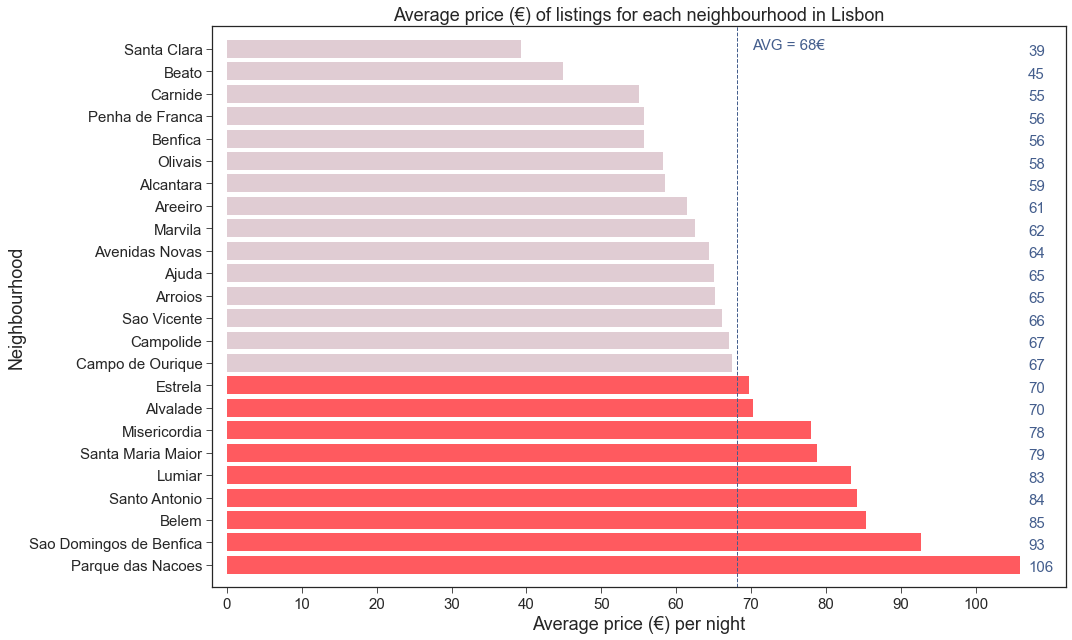

In [378]:
#plt.rcParams['text.color'] = "#445E8D"
price_night = (lisbon_listings
               .groupby("neighbourhood").price
               .mean()
               .reset_index()
               .sort_values("price",ascending=False))

avg= price_night.price.mean()
plt.figure(figsize=(15,9))
#plot neighbourhood in alphabetic order
for i in range(len(price_night)):
    if price_night.price.iloc[i]>avg:
        plt.barh(price_night.neighbourhood.iloc[i],price_night.price.iloc[i],color="#FF5A5F")
    else:
        plt.barh(price_night.neighbourhood.iloc[i],price_night.price.iloc[i],color="#e0ccd3")
    plt.text(x=107,y=i-.3,s=f"{price_night.price.iloc[i]:.0f}",color="#445E8D", fontsize = 15)
#plt.barh(price_night.neighbourhood,price_night.price,color="#fcba03");
plt.axvline(x=price_night.price.mean(),linewidth=1,linestyle="dashed",color="#445E8D")
#plt.text(x=100,y=10,s="aaaaa")
plt.xlim([-2,112])
plt.ylim([-1,24])
plt.text(x=avg+2,y= len(price_night)-1,s=f"AVG = {avg:.0f}€ ",color="#445E8D",fontsize=15)
plt.xticks([i for i in range(0,110,10)], fontsize = 15)
plt.yticks(fontsize = 15)

plt.ylabel("Neighbourhood", fontsize = 18)
plt.xlabel("Average price (€) per night", fontsize = 18)
plt.title("Average price (€) of listings for each neighbourhood in Lisbon", fontsize=18);
plt.tight_layout()
plt.show()

In [379]:
n_listings=lisbon_listings.neighbourhood.value_counts().sort_index().reset_index()
ar_nei=lisbon_listings.groupby("neighbourhood").area.mean()
n_listings["area"]=ar_nei.values
n_listings["listing_density"]= n_listings.neighbourhood / n_listings.area
#n_listings[["index","listing_density"]].to_dict()
density_dict=dict(zip(n_listings["index"].values,n_listings["listing_density"].values))
n_listings.rename(columns={"index":"neighbourhood","neighbourhood":"total_listings"},inplace=True)
n_listings.sort_values("listing_density",ascending=1,inplace=True)

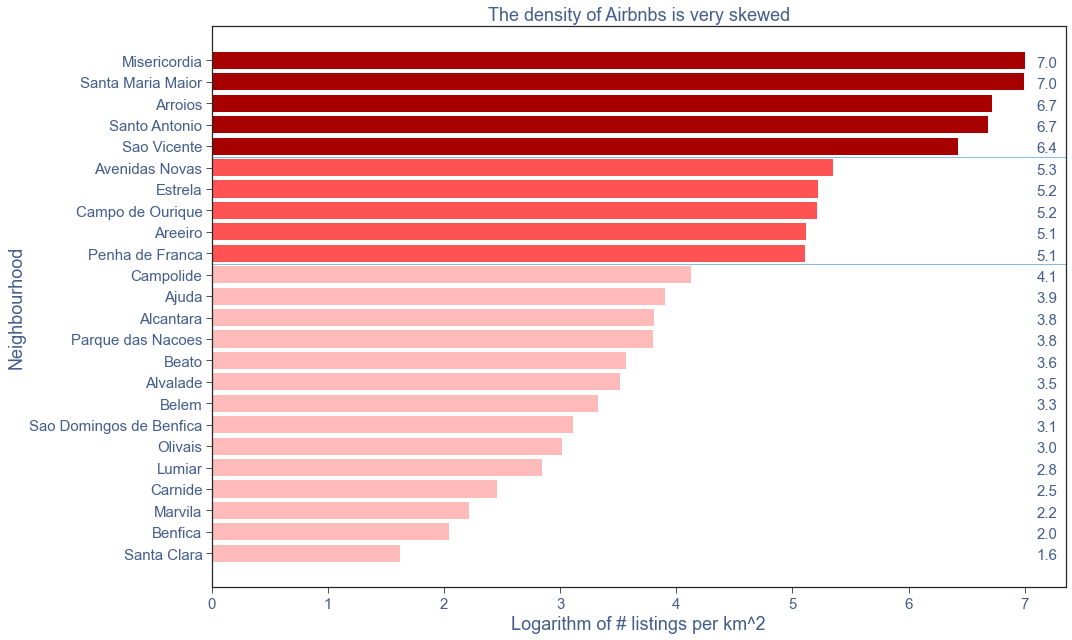

In [380]:
plt.figure(figsize=(15,9))

for i in range(len(n_listings)):
    if n_listings.listing_density.iloc[i]>300:
        plt.barh(n_listings.neighbourhood.iloc[i],np.log(n_listings.listing_density.iloc[i]),color="#a70000")
    elif n_listings.listing_density.iloc[i]>100:
        plt.barh(n_listings.neighbourhood.iloc[i],np.log(n_listings.listing_density.iloc[i]),color="#ff5252")
    else:
        plt.barh(n_listings.neighbourhood.iloc[i],np.log(n_listings.listing_density.iloc[i]),color="#ffbaba")
    plt.text(x=7.1,y=i-.3,s=f"{np.log(n_listings.listing_density.iloc[i]):.1f}",color="#445E8D", fontsize = 15)
        
plt.axhline(y=18.5,linewidth=.5,linestyle="-")
plt.axhline(y=13.5,linewidth=.5,linestyle="-")

plt.xlabel("Logarithm of # listings per km^2", color="#445E8D", fontsize=18)
plt.ylabel("Neighbourhood",color="#445E8D", fontsize = 18)
plt.yticks(color="#445E8D", fontsize = 15)
plt.xticks(color="#445E8D", fontsize = 15)
plt.title("The density of Airbnbs is very skewed",color="#445E8D", fontsize = 18)
plt.tight_layout()
plt.show()        

In [381]:
#loading file and correct neighbourhood names
neighborhoods_lisboa = gpd.read_file("Files/destination_data.shp")
neighborhoods_lisboa.rename(columns={"neighbou_1":"city","neighbourh":"neighbourhood"},inplace=True)
neighborhoods_lisboa.replace({"Misericrdia":"Misericordia",
                       "So Vicente":"Sao Vicente",
                       "Santo Antnio":"Santo Antonio",
                       "Penha de Frana":"Penha de Franca",
                       "Belm":"Belem",
                       "Alcntara":"Alcantara",
                       "So Domingos de Benfica":"Sao Domingos de Benfica",
                       "Parque das Naes":"Parque das Nacoes"},inplace=True)
lisboa_geo=neighborhoods_lisboa.loc[neighborhoods_lisboa.city=="Lisboa"].copy()
#statistics from lisbon_listings
lisbon_listings=lisbon_listings.loc[lisbon_listings.room_type=="Entire home/apt"].copy()
lisbon_df=(
  lisbon_listings
 .groupby("neighbourhood")
 .agg({"price":"mean",
       "area":"mean",
       "calculated_host_listings_count":"mean",
       "accommodates":"mean",
       "review_scores_rating":"mean",
       "id":"count"})
 .reset_index()
 .rename(columns={"calculated_host_listings_count":"listings_per_host",
                 "id":"total_listings"})
)
#add density
lisbon_df["listing_density"]= round(lisbon_df["total_listings"]/lisbon_df["area"],2)
#merge with geographic data
lisbon_df=pd.merge(lisboa_geo,lisbon_df,how="left",on="neighbourhood").drop("city",axis=1)
lisbon_df.head(1)

,neighbourhood,geometry,price,area,listings_per_host,accommodates,review_scores_rating,total_listings,listing_density
0,Lumiar,"POLYGON ((-9.14178 38.77773, -9.14238 38.77702...",99.653333,6.57,5.546667,4.626667,94.333333,75,11.42


In [384]:
# Creation of .json file
geosource_heat = GeoJSONDataSource(geojson = lisbon_df.to_json())

#creation of color bar
plot_height = 650
plot_width = 180
color_bar_height = plot_height + 11
color_bar_width = 180
#color mapper
color_mapper = LogColorMapper(palette="Viridis256", low=lisbon_df['listing_density'].min(), high = lisbon_df['listing_density'].max()+10)

#Define custom tick labels for color bar.
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

#define color_bar_plot to give name to the colorbar
color_bar_plot = figure(title="Airbnbs per km²", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)

color_bar_plot.add_layout(color_bar, 'right')
color_bar_plot.title.align="center"
color_bar_plot.title.text_font_size = '12pt'

#PLOTTING
palette = color_mapper
#LogColorMapper(palette="Viridis256", low=neighborhoods_stats['price'].min(), high = neighborhoods_stats['price'].max()+10)
                               
hover = HoverTool(tooltips= [
                                ('    NEIGHBOURHOOD    ', '@neighbourhood'),
                                ('Area','@area'),
                                ('Number of apartments', '@total_listings'),
                                ('Average price per night [€]','@price'),   
                                
                                ('Average # of listings per owner','@listings_per_host'),                                
                                ])

p = figure(title = 'The highest density of Airbnbs is in the city center', plot_height = 700 , plot_width = 700, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


p.patches('xs','ys', source = geosource_heat,fill_color = {'field' :'listing_density', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)

# Customize layout
p.background_fill_color = None
p.background_fill_alpha = 0.05

p.border_fill_color = None
p.min_border_left = 20

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = None

p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "black"

p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = "black"
p.yaxis.major_label_orientation = "vertical"

#Colorbar layout
p.add_layout(color_bar, 'below')

#show(p)
layout = row(p, color_bar_plot)

output_notebook()
push_notebook()


Loading BokehJS ...

In [385]:
show(layout);


<a id="statistics"></a>
## 2.3 STATISTICAL ANALYSIS

In [342]:
numerical=lisbon_listings.select_dtypes(include=["float64","int64"])
categorical= lisbon_listings.select_dtypes(include="O")
print(numerical.columns, len(numerical.columns))
print(categorical.columns, len(categorical.columns))

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'availability_30',
       'availability_60', 'availability_90', 'area', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object') 26
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'property_type', 'amenities'],
      dtype='object') 7


C:\Users\tobia\Anaconda3\envs\data_viz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


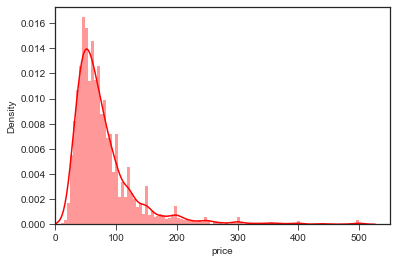

In [343]:
sns.distplot(lisbon_listings["price"],bins=100,hist=True,kde=True, color="r", hist_kws={"alpha":.4});
plt.xlim([0,550]);
plt.show()

In [344]:
numerical.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'availability_30',
       'availability_60', 'availability_90', 'area', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [345]:
df=numerical[["price","calculated_host_listings_count","accommodates","bathrooms_text",
              "bedrooms","beds","availability_90","number_of_reviews","reviews_per_month",
              'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication', 'review_scores_location',
              'review_scores_value','availability_30','availability_60']].copy()

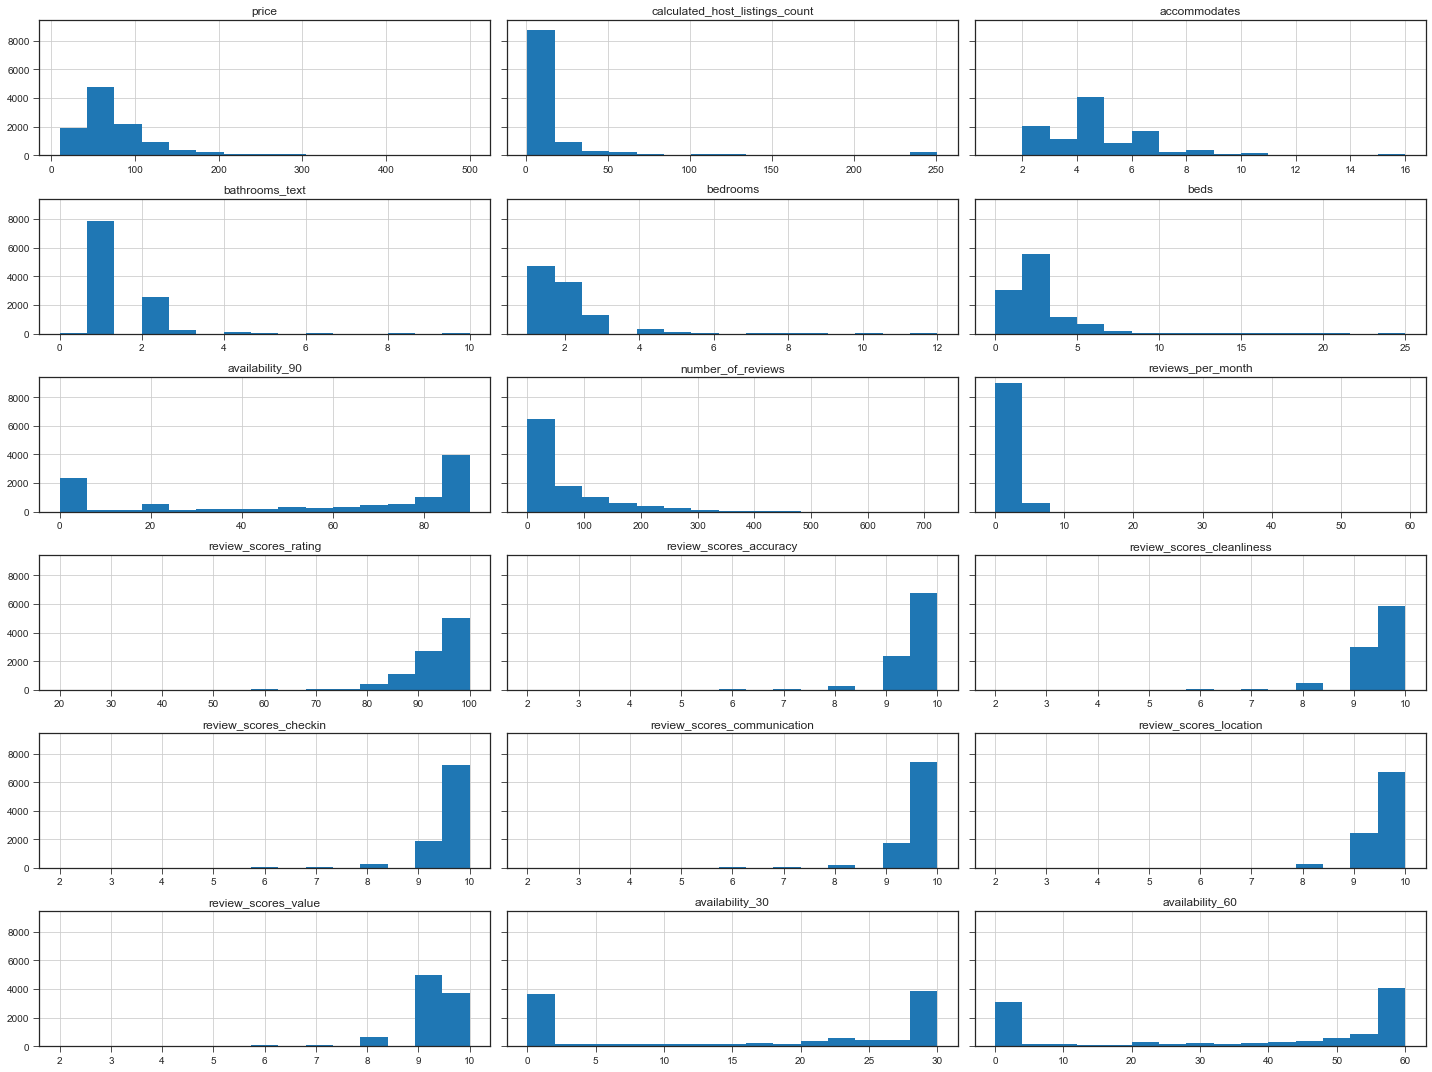

In [346]:
fig,ax = plt.subplots(6,3,sharey=True, figsize = (20,15))
df.hist(bins=15,ax=ax);
fig.set_tight_layout(True)

In [347]:
df.rename(columns={"calculated_host_listings_count":"n_listings_host"},inplace=True)


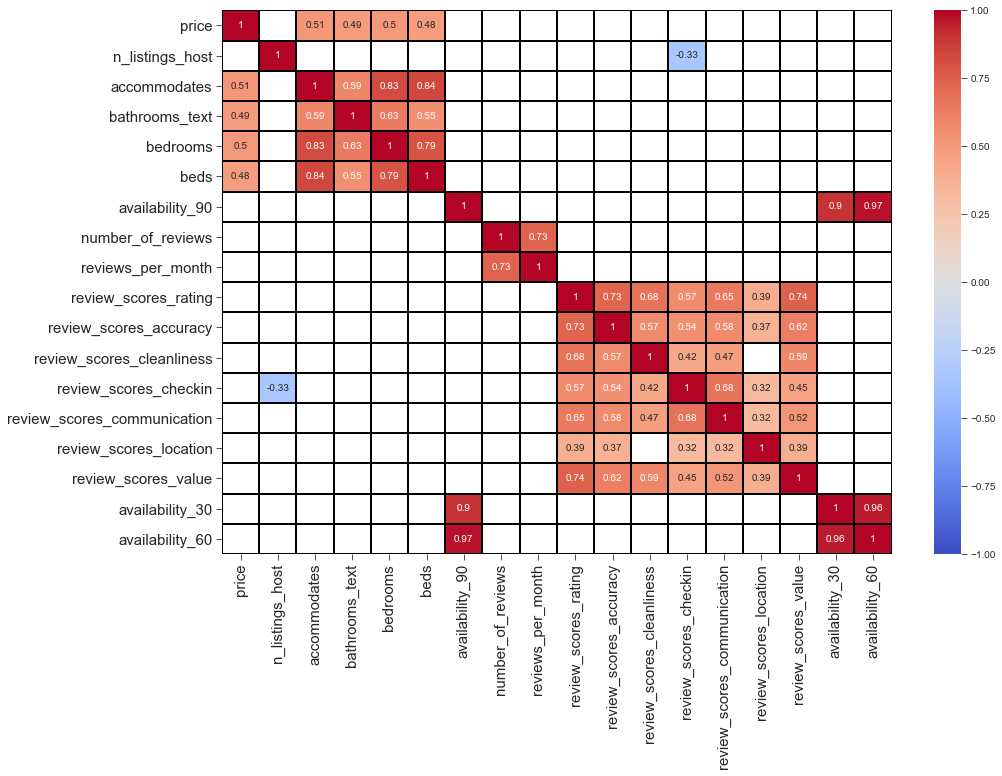

In [348]:
corr = df.corr()
plt.figure(figsize=(15,10))
res=sns.heatmap(corr[abs(corr)>0.3],vmin=-1,vmax=1,annot=True,cmap="coolwarm",linewidth=1,linecolor="k",);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15);

## CAPACITY USAGE OF AIRBNBS

In [349]:
overnight_stays = np.array([999056,1057221,1443330,1636195,1773863,1750628,1874219,2057193,1821478,1728503,1329017,1167761])
# source (https://travelbi.turismodeportugal.pt/en-us/Pages/PowerBI/overnight-stays.aspx) )
months = [datetime.date(year=2019, month=i, day=1) for i in range(1,13)]
Stays = pd.DataFrame({"overnight stays" : overnight_stays/1000000, "month" : months})

In [350]:
av_stays = overnight_stays.mean()
capacity_usage_at_max = 6/7   # in peak period, average aribnb is booked on 6 days per week
usage_rate = (av_stays/max(overnight_stays)) * capacity_usage_at_max

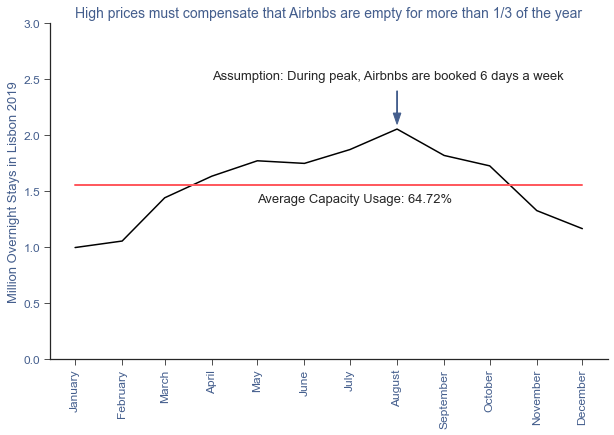

In [351]:
fig,ax = plt.subplots(figsize= (10,10*0.618));
lp = sns.lineplot(data = Stays, 
                     x = "month", 
                     y = "overnight stays",
                     color = "k",
                     ax=ax)
ax.set_ylim(0.0,3)
ax.set_title("High prices must compensate that Airbnbs are empty for more than 1/3 of the year", color="#445E8D", fontsize = 14);
# plt.xlabel("Month", color="#445E8D", fontsize = 14);
plt.xlabel("")
plt.ylabel("Million Overnight Stays in Lisbon 2019", color="#445E8D", fontsize = 13);
plt.xticks(months, ["January","February","March","April","May","June","July","August","September","October","November","December"], rotation=90, color="#445E8D", fontsize = 12);
plt.yticks(color="#445E8D", fontsize = 12)
plt.plot([months[0], months[11]], [av_stays/1000000, av_stays/1000000], color='#FF5A5F', linestyle='-', linewidth=2);
plt.arrow(months[7], 2.4, 0, -0.2, fc="#445E8D", ec="#445E8D",head_width=5, head_length=0.1, color = "#445E8D");
plt.text(months[3],2.5,"Assumption: During peak, Airbnbs are booked 6 days a week", fontdict={"fontsize":13});
plt.text(months[4],1.4,f"Average Capacity Usage: {round(usage_rate*100,2)}%", fontdict={"fontsize":13});
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

<a id="conclusion"></a>
### 4) Conclusion 


###### Under the assumption of an average capacity usage of 64.72%, the Council of Lisbon could implement the strategy exploiting the required 1000 apartments.

In [352]:
lisbon_listings= listings_small.loc[listings_small.neighbourhood_group=="Lisboa"].copy()

bedroom_labels = ["one_bedroom","two_bedrooms","three_bedrooms","four_bedrooms","4+_bedrooms"]
fixed_prices = [600,800,900,1000,1000]
listings_small["bedrooms_count"]=pd.cut(listings.bedrooms,bins=[0,1,2,3,4,25],labels=bedroom_labels,right=True)
listing_constraints = [(bedroom_labels[i],fixed_prices[i]) for i in range(len(bedroom_labels))]
selected_listings = listings_small.copy()


for j in range(len(selected_listings)):                                                                                                        
    for i in range(len(bedroom_labels)):
        if (selected_listings.loc[j,"bedrooms_count"] == listing_constraints[i][0]) & (selected_listings.loc[j,"price"]*30*usage_rate>listing_constraints[i][1]) & (selected_listings.loc[j,"room_type"]=='Entire home/apt'):
            selected_listings.loc[j,'price'] = np.nan
         
selected_listings = selected_listings[(selected_listings['price'].notna()) & (selected_listings['room_type']=='Entire home/apt') & (selected_listings['bedrooms_count'].notna())]


In [353]:
def campaign_dataset(df, availability_threshold=10, USAGE_RATE=0.64):
    '''
    -------------------------
    function CAMPAIGN_DATASET
    -------------------------
    input arguments:
    
    - df: DataFrame to analyze
    
    - availability_threshold: int, minimum number of days that 
    listings are not booked in the last 90 days.
    i.e. if availability_threshold=10, it means that listings
    available at least 10 on 90 days will be considered
    
    - 
    ------------------------
    ouput: 
    - proposal_dataset: Dataframe, cointains listings likely to 
    be targeted by Lisbon municipality
    '''
    DAY_IN_MONTH=30
    #first constraint, only entire apartments
    df= df.loc[df["room_type"]=="Entire home/apt"].copy()
    #second constraint, availability
    df = df.loc[df["availability_90"]>availability_threshold].copy()
    #monthly rent
    df["monthly_rent"]= df["price"] * DAY_IN_MONTH
    #adjusted monthly_rent on usage rate
    df["adjusted_rent"] = df["monthly_rent"] * USAGE_RATE
    #apply listings price threshold values from the municipality
    df["threshold"]=df.bedrooms.apply(lambda x: threshold(x))
    #slice dataframe if adjusted monthly price is lower than the municipality threshold
    proposal_dataset= df.loc[df["threshold"]>=df["adjusted_rent"]].copy()
    
    return proposal_dataset   
    
def threshold(x):
    thres_dict={
        1:600,
        2:800,
        3:900,        
    }
    t=0
    if x in thres_dict.keys():
        t=thres_dict[x]
        return t
    else:
        t=1000
        return t 

In [354]:
final_df=campaign_dataset(lisbon_listings, availability_threshold=10)

In [355]:
l1 = list(listings_small["id"]) 
#l2 = list(selected_listings["id"])
l2 = list(final_df["id"])
results = np.in1d(l1, l2)
listings_small["attracted"] = results

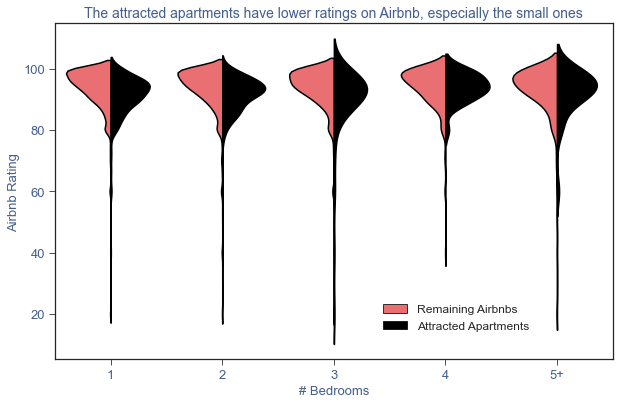

In [356]:
fig, ax = plt.subplots(1,1, figsize=(10,10*0.618))

sns.violinplot(x="bedrooms_count" ,y="review_scores_rating", hue="attracted", data=listings_small, inner=None, palette = {True:"k", False:"#FF5A5F"}, split=True, ax=ax);

plt.title("The attracted apartments have lower ratings on Airbnb, especially the small ones", color="#445E8D", fontsize = 14)
plt.xlabel("# Bedrooms", color="#445E8D", fontsize = 13)
plt.ylabel("Airbnb Rating", color="#445E8D", fontsize = 13);

handles = ax.get_legend_handles_labels()[0]

ax.legend(loc=(0.58,0.07), labels = ["Remaining Airbnbs", "Attracted Apartments"], handles = handles, fontsize=12)
# L = plt.legend()
# L.get_texts()[0].set_text('Remaining Airbnbs')
# L.get_texts()[1].set_text('Attracted Appartments')
# plt.legend(loc=(0.64,0.07))

ticks_pos = plt.xticks()
plt.xticks(ticks=ticks_pos[0], labels = ["1", "2", "3", "4", "5+"], color="#445E8D", fontsize = 13);
plt.yticks(color="#445E8D", fontsize = 13);

In [357]:
neighbourhood_selected_average =selected_listings.groupby(["neighbourhood","bedrooms_count"]).price.mean()
neighbourhood_selected_average

selected_group_plot = neighbourhood_selected_average[['Santa Maria Maior','Misericordia','Arroios','Sao Vicente','Santo Antonio']]


#### As suggested, the Portuguese municipality will be able to find the required number of apartments in the city of Lisbon.

In [358]:
lats_selected = selected_listings['latitude'].tolist()
lons_selected = selected_listings['longitude'].tolist()
locations = list(zip(lats_selected, lons_selected))

map2 = folium.Map(location=[38.740744475993871, -9.236274013769265],
                  zoom_start=11.5,control_scale=True,)


folium.CircleMarker(
    location=[38.75141244475993871, -9.166274013769265],
    radius=220,
    popup='Lisboa',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map2)


FastMarkerCluster(data=locations,).add_to(map2);


In [359]:
map2

#### The Renda Sicura program could be applied to all the most targeted neighborhoods in all the apartment types.

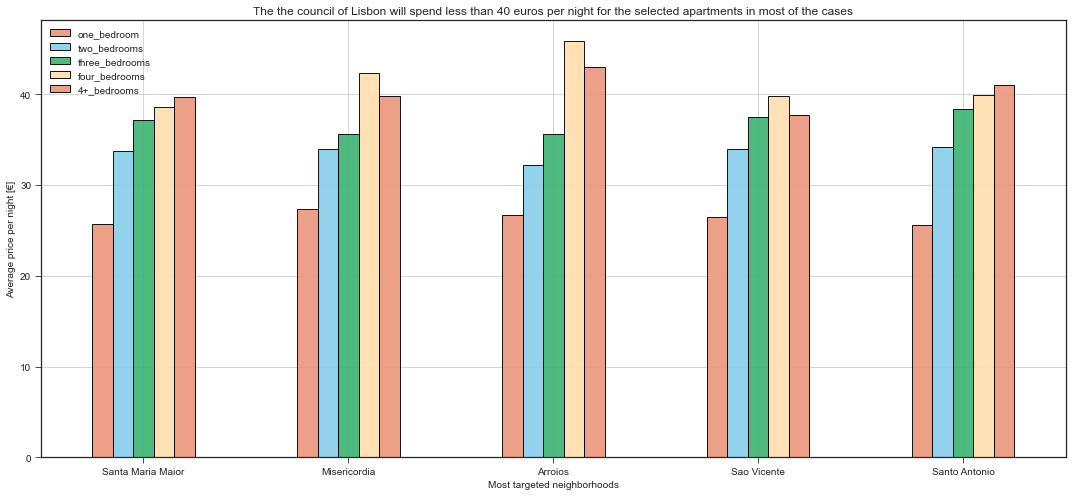

In [360]:
plt.style.use('seaborn-ticks')
fig,ax = plt.subplots(1,1,figsize=(15,7))
colors = ["darksalmon","skyblue","mediumseagreen","navajowhite"]
selected_group_plot.unstack().plot(kind='bar',ax=ax, edgecolor = "black", alpha = .9, color = colors, grid = True)

plt.xticks(rotation=0);
plt.ylabel("Average price per night [€]")
plt.xlabel("Most targeted neighborhoods")
plt.title("The the council of Lisbon will spend less than 40 euros per night for the selected apartments in most of the cases")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

#### The discrepancies between prices tend to reduce when the number of rooms increases

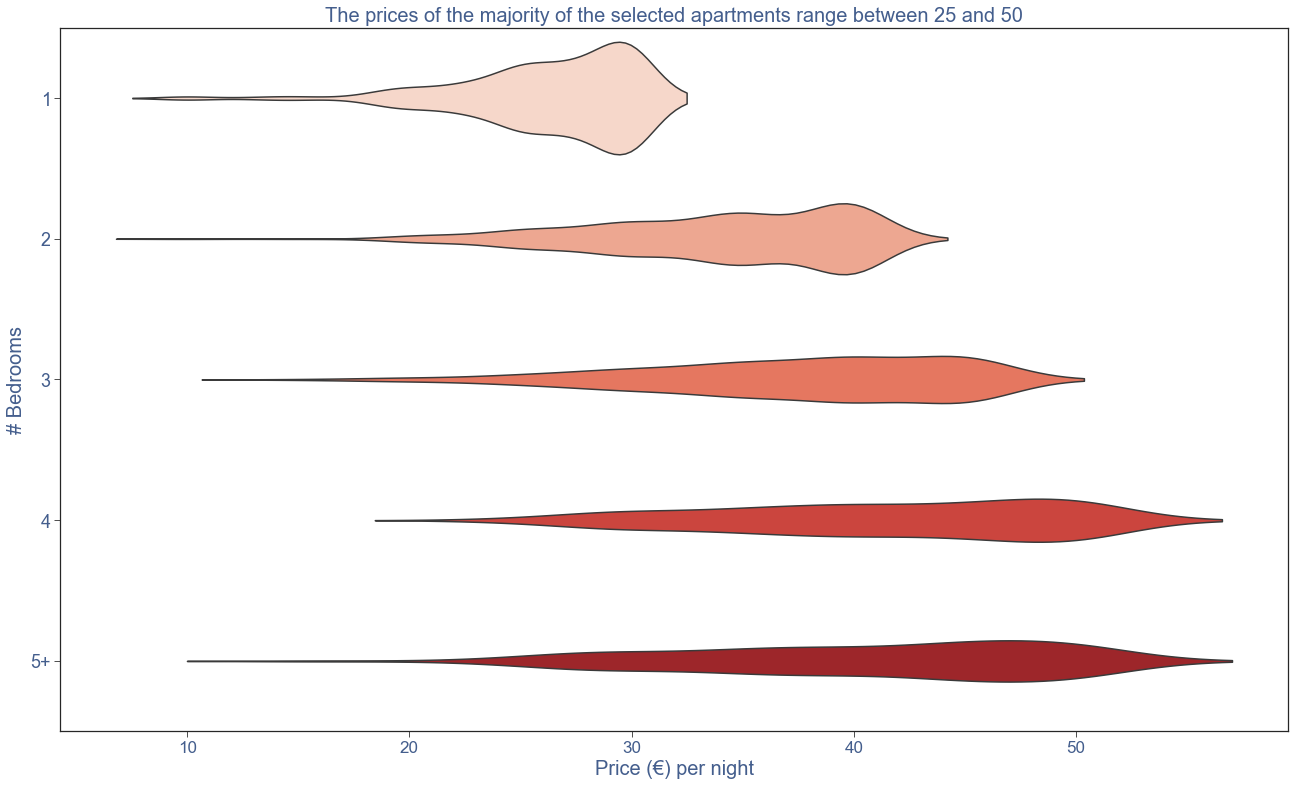

In [361]:
sel_lst =  selected_listings[(selected_listings['bedrooms_count'] != '4+_bedrooms')]

fig, ax = plt.subplots(figsize=[22,8*1.618])
sns.violinplot(data=sel_lst, y=selected_listings["bedrooms_count"], x=selected_listings["price"], inner=None, palette = "Reds");
# ax.set(ylabel='',xlabel='Price [€]', title='The prices of the majority of the selected apartments range between 25 and 50');

plt.title('The prices of the majority of the selected apartments range between 25 and 50', color="#445E8D", fontsize = 20)
plt.xlabel("Price (€) per night", color="#445E8D", fontsize = 20)
plt.ylabel("# Bedrooms", color="#445E8D", fontsize = 20);
ticks_pos = plt.yticks()
plt.yticks(ticks=ticks_pos[0], labels = ["1", "2", "3", "4", "5+"], color="#445E8D", fontsize = 18);
plt.xticks(color="#445E8D", fontsize = 17);


In [362]:
#Title on colorbar, viridis, and logscale for colors
# loading shape file (background) and csv file (stats)

neighborhoods_lisboa = gpd.read_file("Files/destination_data.shp")

# Excluded values (without stats)
#print('Unfortunately there are no apartments available for these neighborhoods:')
#for i in range(0,len(neighborhoods_lisboa['neighbourh'].unique())):
#    if neighborhoods_lisboa['neighbourh'].unique()[i] not in listings['neighbourhood'].unique():
#        print(neighborhoods_lisboa['neighbourh'].unique()[i])
#    else:continue

        
# Creation of a dataframe with average values for neighborhoods
selected_listings['apartments_count'] = np.ones(len(selected_listings))
house_counter = selected_listings.groupby(by='neighbourhood')['apartments_count'].count()

listings_per_neighborhood = selected_listings.groupby(by='neighbourhood').mean()[['price','calculated_host_listings_count','availability_365','reviews_per_month','number_of_reviews','minimum_nights']]
listings_per_neighborhood['apartment_count'] = house_counter


# Merge shapefile with stats file (.csv)
neighborhoods_stats = neighborhoods_lisboa.merge(listings_per_neighborhood, left_on = 'neighbourh', right_on = 'neighbourhood')


# Creation of .json file
geosource_heat = GeoJSONDataSource(geojson = neighborhoods_stats.to_json())


#creation of color bar
plot_height = 650
plot_width = 180
color_bar_height = plot_height + 11
color_bar_width = 180


color_mapper = LogColorMapper(palette="Viridis256", low=neighborhoods_stats['price'].min(), high = neighborhoods_stats['price'].max()+10)


#Define custom tick labels for color bar.
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

#define color_bar_plot to give name to the colorbar
color_bar_plot = figure(title="Price per night [€]", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)

color_bar_plot.add_layout(color_bar, 'right')
color_bar_plot.title.align="center"
color_bar_plot.title.text_font_size = '12pt'



#PLOTTING

palette = LogColorMapper(palette="Viridis256", low=neighborhoods_stats['price'].min(), high = neighborhoods_stats['price'].max()+10)

                               
                                 
hover = HoverTool(tooltips= [
                                ('    REGION    ', '@neighbourh'),
                                ('Average price [€]','@price'),
                                ('Number of apartments', '@apartment_count'),
                                ('Average # of listings per owner','@calculated_host_listings_count'),
                                ('Average yearly availability', '@availability_365'),
                                
                                ])



p = figure(title = 'LISBOA PRICES & STATS', plot_height = 700 , plot_width = 700, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


p.patches('xs','ys', source = geosource_heat,fill_color = {'field' :'price', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)



# Customize layout

p.background_fill_color = None
p.background_fill_alpha = 0.05

p.border_fill_color = None
p.min_border_left = 20

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = None

p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "black"

p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = "black"
p.yaxis.major_label_orientation = "vertical"

#Colorbar layout
p.add_layout(color_bar, 'below')

#show(p)

layout = row(p, color_bar_plot)

output_notebook()
push_notebook()

Loading BokehJS ...

C:\Users\tobia\Anaconda3\envs\data_viz\lib\site-packages\bokeh\io\notebook.py:252: UserWarning: Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()
  warn("Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()")


#### Finally, the council of Lisbon should not be worried in significant differences in prices among the different neighborhoods. 

In [363]:
show(layout)

In [364]:
campaign=final_df.groupby("neighbourhood").agg({"id":"count","price":"mean"}).reset_index().rename(columns={"id":"campaign_count","price":"campaign_price"})
campaign.head()


,neighbourhood,campaign_count,campaign_price
0,Ajuda,10,31.200000
1,Alcantara,20,36.000000
2,Alvalade,7,38.714286
3,Areeiro,8,39.625000
4,Arroios,93,32.569892


In [365]:
lisbon_df=pd.merge(lisbon_df,campaign,how="left",on="neighbourhood")
lisbon_df["turnover_campaign"]= round(lisbon_df["campaign_count"]/lisbon_df["total_listings"],2)*100


In [366]:
lisbon_df["campaign_count"].fillna(0,inplace=True)
lisbon_df["campaign_count"]=lisbon_df["campaign_count"].astype(int)

In [367]:
# Creation of .json file
geosource_heat = GeoJSONDataSource(geojson = lisbon_df.to_json())

#creation of color bar
plot_height = 650
plot_width = 180
color_bar_height = plot_height + 11
color_bar_width = 180
#color mapper
color_mapper = LogColorMapper(palette="Reds256", low=lisbon_df['turnover_campaign'].min(), high = lisbon_df['turnover_campaign'].max()+5)

#Define custom tick labels for color bar.
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

#define color_bar_plot to give name to the colorbar
color_bar_plot = figure(title="TURNOVER RATE", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)

color_bar_plot.add_layout(color_bar, 'right')
color_bar_plot.title.align="center"
color_bar_plot.title.text_font_size = '12pt'

#PLOTTING
palette = color_mapper
                               
hover = HoverTool(tooltips= [
                                ('    NEIGHBOURHOOD    ', '@neighbourhood'),
                                ('Area','@area'),
                                ('Number of apartments', '@total_listings'),
                                ('Number of apartments renta segura','@campaign_count'),
                                ('Average price [€]','@price'),
                                ('Average price[€] for renta segura','@campaign_price')                                
                                ])

p = figure(title = 'BBBBBBBBBBBBBBBBBBB', plot_height = 700 , plot_width = 700, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


p.patches('xs','ys', source = geosource_heat,fill_color = {'field' :'turnover_campaign', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)

# Customize layout
p.background_fill_color = None
p.background_fill_alpha = 0.05

p.border_fill_color = None
p.min_border_left = 20

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = None

p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "black"

p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = "black"
p.yaxis.major_label_orientation = "vertical"

#Colorbar layout
p.add_layout(color_bar, 'below')

#show(p)
layout = row(p, color_bar_plot)

output_notebook()
push_notebook()
show(layout);

Loading BokehJS ...

C:\Users\tobia\Anaconda3\envs\data_viz\lib\site-packages\bokeh\io\notebook.py:252: UserWarning: Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()
  warn("Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()")


In [368]:
final_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,monthly_rent,adjusted_rent,threshold
36,119120,Lapa 2Bdr with City and River Views,387186,Nuno,Lisboa,Estrela,38.70927,-9.16122,Entire home/apt,41,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1230,787.2,800
49,138929,Regueira street Apartm 88 4floor Alfama - 2859...,677938,Diogo And Maria,Lisboa,Santa Maria Maior,38.71231,-9.12918,Entire home/apt,23,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,690,441.6,600
58,149274,"Sunny 1BR - Av. D. Carlos I, Lisbon",676330,Margarida,Lisboa,Misericordia,38.71018,-9.15282,Entire home/apt,30,...,94.0,10.0,10.0,10.0,10.0,10.0,10.0,900,576.0,600
79,186996,"Apartment Jasmim, in historic center",899179,Beco Do Jasmim,Lisboa,Santa Maria Maior,38.71550,-9.13513,Entire home/apt,29,...,92.0,9.0,10.0,10.0,10.0,9.0,9.0,870,556.8,600
158,307683,"Alfama,Lisbon--Window of the World",727771,Susana,Lisboa,Santa Maria Maior,38.71143,-9.12778,Entire home/apt,47,...,94.0,10.0,10.0,9.0,9.0,10.0,9.0,1410,902.4,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,45938771,House of Comfort 3 Apartment in Central Lisbon,359656933,Jose,Lisboa,Arroios,38.72315,-9.13325,Entire home/apt,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840,537.6,600
20002,45947846,Terreirinho 3 - Typical cozy flat in Mouraria!,372489585,Mfl,Lisboa,Sao Vicente,38.71627,-9.13239,Entire home/apt,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900,576.0,900
20005,45952880,SAO BENTO TERRACE by HOMING,104083974,Homing,Lisboa,Santo Antonio,38.71743,-9.15424,Entire home/apt,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140,729.6,800
20006,45952891,Stylish Mouraria Flat,372532929,Maxime,Lisboa,Santa Maria Maior,38.71574,-9.13378,Entire home/apt,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050,672.0,800


In [369]:
def campaign_dataset_bokeh(df, lisbon_df=lisbon_df, availability_threshold=10, USAGE_RATE=0.64):
    '''
    -------------------------
    function CAMPAIGN_DATASET
    -------------------------
    input arguments:
    
    - df: DataFrame to analyze
    
    - availability_threshold: int, minimum number of days that 
    listings are not booked in the last 90 days.
    i.e. if availability_threshold=10, it means that listings
    available at least 10 on 90 days will be considered
    
    - 
    ------------------------
    ouput: 
    - proposal_dataset: Dataframe, cointains listings likely to 
    be targeted by Lisbon municipality
    '''
    DAY_IN_MONTH=30
    #first constraint, only entire apartments
    df= df.loc[df["room_type"]=="Entire home/apt"].copy()
    #second constraint, availability
    df = df.loc[df["availability_90"]>availability_threshold].copy()
    #monthly rent
    df["monthly_rent"]= df["price"] * DAY_IN_MONTH
    #adjusted monthly_rent on usage rate
    df["adjusted_rent"] = df["monthly_rent"] * USAGE_RATE
    #apply listings price threshold values from the municipality
    df["threshold"]=df.bedrooms.apply(lambda x: threshold(x))
    #slice dataframe if adjusted monthly price is lower than the municipality threshold
    proposal_dataset= df.loc[df["threshold"]>=df["adjusted_rent"]].copy()
    
    campaign=proposal_dataset.groupby("neighbourhood").agg({"id":"count","price":"mean"}).reset_index().rename(columns={"id":"campaign_count","price":"campaign_price"})
    lisbon_df=pd.merge(lisbon_df,campaign,how="left",on="neighbourhood")
    lisbon_df["turnover_campaign"]= round(lisbon_df["campaign_count"]/lisbon_df["total_listings"],2)*100
    lisbon_df["campaign_count"].fillna(0,inplace=True)
    lisbon_df["campaign_count"]=lisbon_df["campaign_count"].astype(int)

    return lisbon_df
    
def threshold(x):
    thres_dict={
        1:600,
        2:800,
        3:900,        
    }
    t=0
    if x in thres_dict.keys():
        t=thres_dict[x]
        return t
    else:
        t=1000
        return t 

In [370]:
alpha=campaign_dataset_bokeh(lisbon_listings)
alpha.head(2)

KeyError: 'campaign_count'

In [ ]:
alpha.campaign_count.sum()

In [ ]:
beta=campaign_dataset_bokeh(lisbon_listings,USAGE_RATE=.6)
beta.campaign_count.sum()

In [ ]:
teta=campaign_dataset_bokeh(lisbon_listings,USAGE_RATE=.56)
teta.campaign_count.sum()

In [ ]:
possible_rates=[0.64,0.6,0.56]
counts_renda=[]

plt.figure(figsize=(10,6))
for n,rate in enumerate(possible_rates):
    d=campaign_dataset_bokeh(lisbon_listings,USAGE_RATE=rate)
    tot=d.campaign_count.sum()
    counts_renda.append(tot)
    plt.bar(n,tot,width=.4)
    plt.text(n,tot+1,"b")
 
plt.title("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
plt.xticks(ticks=[0,1,2],labels=possible_rates)
plt.ylim([0,1800])
plt.xlabel("usage rate for the future year")
plt.ylabel("# listings in the renda segura")
plt.show()
    
    

In [ ]:
(counts_renda[1]-counts_renda[0])/counts_renda[0]

In [ ]:
possible_rates=[0.64,0.6,0.56]
col=["#ffbaba","#ff5252","#a70000"]
counts_renda=[]

plt.figure(figsize=(10,6))
for n,rate in enumerate(possible_rates):
    d=campaign_dataset_bokeh(lisbon_listings,USAGE_RATE=rate)
    tot=d.campaign_count.sum()
    counts_renda.append(tot)
    plt.bar(n,tot,width=.6,color=col[n],edgecolor="k")
    plt.text(n,tot+20,f"{tot}",ha="center",va="bottom",fontsize=20)

t1=((counts_renda[1]-counts_renda[0])/counts_renda[0])*100
t2=((counts_renda[2]-counts_renda[0])/counts_renda[0])*100
plt.axhline(y=counts_renda[0],linestyle="dashed",color="k")
plt.text(0,100,"base",ha="center",va="bottom",color="w",fontsize=20,weight="heavy")
plt.text(1,counts_renda[0]+40,f"+{t1:.0f}%",ha="center",va="bottom",color="w",fontsize=20,weight="heavy")   
plt.text(2,counts_renda[0]+205,f"+{t2:.0f}%",ha="center",va="bottom",color="w",fontsize=20,weight="heavy")
plt.title("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
plt.xticks(ticks=[0,1,2],labels=possible_rates)
plt.ylim([0,1700])
plt.xlabel("usage rate for the future year",fontsize=20)
plt.ylabel("# listings in the renda segura",fontsize=20)
plt.tight_layout()
plt.show()